In [ ]:
import torch
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision import datasets

In [ ]:

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5])
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5])
])

# Load datasets
train_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=train_transform
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=test_transform
)


100%|██████████| 170M/170M [00:05<00:00, 28.4MB/s]


In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=32, shuffle=False)

## Implementation of Alex Net from Scratch

Implemented a modified version of AlexNet to classify images from the CIFAR-10 dataset.
Adapted the original architecture to handle 32x32 input images and 10 output classes.
Retained key components like ReLU activations, dropout, and convolutional layers.
Trained the model using PyTorch with accuracy tracking on training and test sets.

In [ ]:
from torch import nn

In [ ]:
class ALexNet(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape):
    super().__init__()
    self.block1 = nn.Sequential(
    nn.Conv2d(input_shape, 64, kernel_size=3, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2, 2)
    )
    self.block2 = nn.Sequential(
        nn.Conv2d(64, 192, kernel_size=3, padding=1),
        nn.BatchNorm2d(192),
        nn.ReLU(),
        nn.MaxPool2d(2, 2)
    )
    self.block3 = nn.Sequential(
        nn.Conv2d(192, 384, kernel_size=3, padding=1),
        nn.BatchNorm2d(384),
        nn.ReLU()
    )
    self.block4 = nn.Sequential(
        nn.Conv2d(384, 256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU()
    )
    self.block5 = nn.Sequential(
        nn.Conv2d(256, 256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(2, 2)
    )

    with torch.no_grad():
      dummy = torch.zeros(1, input_shape, 32, 32)  # change 224 if needed
      x = self.block1(dummy)
      x = self.block2(x)
      x = self.block3(x)
      x = self.block4(x)
      x = self.block5(x)
      self.flattened_size = x.view(1, -1).shape[1]
    self.flatten = nn.Flatten()
    self.fc1 = nn.Sequential(
        nn.Linear(in_features=self.flattened_size,
                  out_features=1024),
        nn.ReLU(),
        nn.Dropout(0.5)
    )
    self.fc2 = nn.Sequential(
        nn.Linear(1024, 1024),
        nn.ReLU(),
        nn.Dropout(0.5)
    )
    self.classifier = nn.Sequential(
        nn.Linear(1024, output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.block1(x)
    x = self.block2(x)
    x = self.block3(x)
    x = self.block4(x)
    x = self.block5(x)
    x = self.flatten(x)
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.classifier(x)

    return x


In [ ]:
model_0 = ALexNet(3, 64, 10)
model_0

ALexNet(
  (block1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): Sequential(
    (0): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (block4): Sequential(
    (0): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [ ]:
model_0.state_dict()

OrderedDict([('block1.0.weight',
              tensor([[[[ 1.8448e-01,  5.1561e-02, -9.1559e-02],
                        [ 8.1319e-02,  3.6815e-02,  4.4932e-02],
                        [ 8.8285e-02,  1.5231e-01, -1.3875e-01]],
              
                       [[-1.0225e-01,  7.1581e-02, -7.2886e-02],
                        [ 1.0072e-01,  1.0994e-01,  1.5207e-01],
                        [ 1.4403e-01, -1.5484e-01,  1.3235e-01]],
              
                       [[-1.8149e-01,  7.5856e-02, -4.0326e-02],
                        [ 6.0461e-02, -1.4965e-02,  1.1076e-01],
                        [-6.6110e-02, -7.0146e-02, -9.2568e-02]]],
              
              
                      [[[ 6.3295e-02, -1.5943e-01,  5.5628e-03],
                        [ 1.2095e-01,  9.2942e-02,  1.1818e-01],
                        [-1.2154e-01,  7.0365e-02,  8.2520e-02]],
              
                       [[-1.0475e-01, -1.1667e-01,  2.4579e-02],
                        [ 1.1214e-01, -1.5

In [ ]:
images = torch.randn(size=(32, 3, 32, 32))
test_image = images[0]
test_image = test_image.unsqueeze(0)

In [ ]:
model_0.eval()
with torch.inference_mode():
  pred = model_0(test_image)

print(f"output logits: {pred}")
print(f"Output pred prob: {torch.softmax(pred, dim=1)}")
print(f"Output prob: {torch.argmax(torch.softmax(pred, dim=1))}")

output logits: tensor([[-0.0237,  0.0177,  0.0033, -0.0070, -0.0043,  0.0091,  0.0181,  0.0338,
         -0.0093, -0.0110]])
Output pred prob: tensor([[0.0974, 0.1015, 0.1001, 0.0990, 0.0993, 0.1006, 0.1015, 0.1031, 0.0988,
         0.0986]])
Output prob: 7


In [ ]:
!pip install torchinfo
import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1,3,32, 32])

Layer (type:depth-idx)                   Output Shape              Param #
ALexNet                                  [1, 10]                   --
├─Sequential: 1-1                        [1, 64, 16, 16]           --
│    └─Conv2d: 2-1                       [1, 64, 32, 32]           1,792
│    └─BatchNorm2d: 2-2                  [1, 64, 32, 32]           128
│    └─ReLU: 2-3                         [1, 64, 32, 32]           --
│    └─MaxPool2d: 2-4                    [1, 64, 16, 16]           --
├─Sequential: 1-2                        [1, 192, 8, 8]            --
│    └─Conv2d: 2-5                       [1, 192, 16, 16]          110,784
│    └─BatchNorm2d: 2-6                  [1, 192, 16, 16]          384
│    └─ReLU: 2-7                         [1, 192, 16, 16]          --
│    └─MaxPool2d: 2-8                    [1, 192, 8, 8]            --
├─Sequential: 1-3                        [1, 384, 8, 8]            --
│    └─Conv2d: 2-9                       [1, 384, 8, 8]            663,936


In [ ]:
import torch.optim as optim
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.5)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
model = model_0.to(device)
epochs = 40

epoch_count = []
train_loss_values = []
train_acc_values = []
test_loss_values = []
test_acc_values = []

for epoch in range(epochs):
    model.train()
    train_loss, train_acc = 0, 0

    for batch, (images, labels) in enumerate(train_dataloader):
        images = images.to(device)
        labels = labels.long().to(device)

        y_pred = model(images)
        loss = loss_fn(y_pred, labels)
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == labels).sum().item()/len(y_pred)

    train_loss = train_loss / len(train_dataloader)
    train_acc = train_acc/len(train_dataloader)

    model.eval()
    test_loss = 0
    test_acc = 0

    with torch.inference_mode():
        for test_images, test_labels in test_dataloader:
            test_images = test_images.to(device)
            test_labels = test_labels.long().to(device)

            test_pred = model(test_images)
            loss = loss_fn(test_pred, test_labels)
            test_loss += loss.item()

            test_pred_labels = test_pred.argmax(dim=1)
            test_acc += ((test_pred_labels == test_labels).sum().item()/len(test_pred_labels))

    test_loss = test_loss / len(test_dataloader)
    test_acc = test_acc / len(test_dataloader)

    epoch_count.append(epoch)
    train_loss_values.append(train_loss)
    train_acc_values.append(train_acc)
    test_loss_values.append(test_loss)
    test_acc_values.append(test_acc)

    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Train Accuracy: {train_acc*100:.2f}% | Test Accuracy: {test_acc*100:.2f}%")
    scheduler.step()

Epoch: 0 | Train loss: 1.7708 | Test loss: 1.3986 | Train Accuracy: 33.28% | Test Accuracy: 49.18%
Epoch: 1 | Train loss: 1.3602 | Test loss: 1.1188 | Train Accuracy: 51.32% | Test Accuracy: 60.27%
Epoch: 2 | Train loss: 1.1074 | Test loss: 1.1572 | Train Accuracy: 61.54% | Test Accuracy: 60.84%
Epoch: 3 | Train loss: 0.9447 | Test loss: 0.7786 | Train Accuracy: 67.97% | Test Accuracy: 73.34%
Epoch: 4 | Train loss: 0.8220 | Test loss: 0.6917 | Train Accuracy: 72.24% | Test Accuracy: 75.85%
Epoch: 5 | Train loss: 0.7422 | Test loss: 0.6945 | Train Accuracy: 75.14% | Test Accuracy: 76.66%
Epoch: 6 | Train loss: 0.6685 | Test loss: 0.5982 | Train Accuracy: 77.86% | Test Accuracy: 79.50%
Epoch: 7 | Train loss: 0.6140 | Test loss: 0.5556 | Train Accuracy: 79.53% | Test Accuracy: 81.58%
Epoch: 8 | Train loss: 0.5822 | Test loss: 0.5435 | Train Accuracy: 80.78% | Test Accuracy: 81.51%
Epoch: 9 | Train loss: 0.5339 | Test loss: 0.5400 | Train Accuracy: 82.28% | Test Accuracy: 81.99%
Epoch: 10 

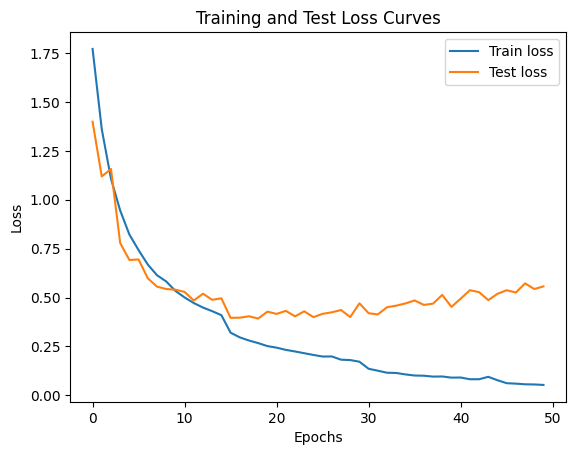

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

train_loss_np = torch.tensor(train_loss_values).cpu().numpy()
test_loss_np = torch.tensor(test_loss_values).cpu().numpy()
train_acc_np = torch.tensor(train_acc_values).cpu().numpy()
test_acc_np = torch.tensor(test_acc_values).cpu().numpy()

plt.plot(epoch_count, train_loss_np, label="Train loss")
plt.plot(epoch_count, test_loss_np, label="Test loss")
plt.title("Training and Test Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

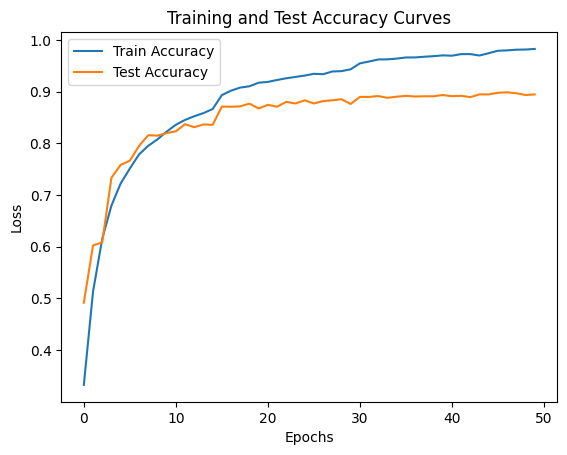

In [ ]:
plt.plot(epoch_count, train_acc_np, label="Train Accuracy")
plt.plot(epoch_count, test_acc_np, label="Test Accuracy")
plt.title("Training and Test Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok = True)

MODEL_NAME = "model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/model_0.pth
